In [224]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from PIL import Image
import torch

In [225]:
base_path = "jpeg/train/"

In [226]:
csv_file = pd.read_csv("train.csv")

In [227]:
csv_file.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [228]:
labels = []
for label in os.listdir(base_path):
    labels.append(label.split(".")[0])

labels = sorted(labels)
labels

['ISIC_0082348',
 'ISIC_0103298',
 'ISIC_0106091',
 'ISIC_0156460',
 'ISIC_0160831',
 'ISIC_0167093',
 'ISIC_0173385',
 'ISIC_0181374',
 'ISIC_0181445',
 'ISIC_0182730',
 'ISIC_0185547',
 'ISIC_0188415',
 'ISIC_0189333',
 'ISIC_0201351',
 'ISIC_0201689',
 'ISIC_0204819',
 'ISIC_0205748',
 'ISIC_0216690',
 'ISIC_0223857',
 'ISIC_0229459',
 'ISIC_0230209',
 'ISIC_0236739',
 'ISIC_0238940',
 'ISIC_0242646',
 'ISIC_0250839',
 'ISIC_0254158',
 'ISIC_0260316',
 'ISIC_0265576',
 'ISIC_0266738',
 'ISIC_0268784',
 'ISIC_0271408',
 'ISIC_0273664',
 'ISIC_0274900',
 'ISIC_0281286',
 'ISIC_0289191',
 'ISIC_0299520',
 'ISIC_0303196',
 'ISIC_0305879',
 'ISIC_0309912',
 'ISIC_0311412',
 'ISIC_0313067',
 'ISIC_0316656',
 'ISIC_0322637',
 'ISIC_0329458',
 'ISIC_0335396',
 'ISIC_0359307',
 'ISIC_0360988',
 'ISIC_0361149',
 'ISIC_0363251',
 'ISIC_0371038',
 'ISIC_0375068',
 'ISIC_0378399',
 'ISIC_0387297',
 'ISIC_0402674',
 'ISIC_0403458',
 'ISIC_0404809',
 'ISIC_0409172',
 'ISIC_0415496',
 'ISIC_0419302

In [229]:
csv_file.loc[(csv_file["target"] == 1) & (csv_file["image_name"].isin(labels))].head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
475,ISIC_0250839,IP_6234053,male,75.0,head/neck,melanoma,malignant,1
2833,ISIC_0946787,IP_9738076,female,90.0,lower extremity,melanoma,malignant,1
3211,ISIC_1071355,IP_9329623,male,75.0,upper extremity,melanoma,malignant,1
4168,ISIC_1356715,IP_6940325,female,30.0,torso,melanoma,malignant,1
6606,ISIC_2071966,IP_8154616,female,80.0,lower extremity,melanoma,malignant,1


In [230]:
class_to_idx = {}
for label in labels:
    class_to_idx[label] = csv_file.loc[csv_file['image_name'] == label, 'target'].values[0]

idx_to_class = {v: k for k, v in class_to_idx.items()}

In [231]:
print(class_to_idx["ISIC_0250839"])

1


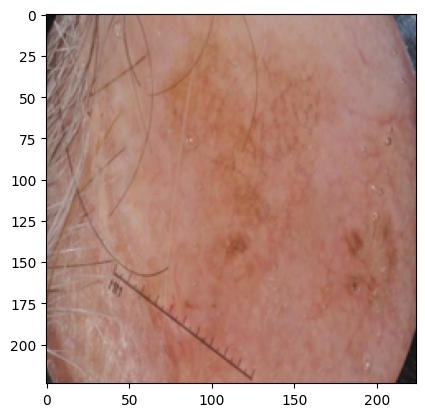

In [232]:
def load_image(image_path, label):
    image = Image.open(image_path)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = image.resize((224, 224))
    x = np.array(image)
    x = x / 255
    x = torch.tensor(x, dtype=torch.float32)
    x = x.permute(2, 0, 1)

    y = class_to_idx[label]
    y = torch.tensor(y)

    return x, y

# load a sample image and plot it
x,y = load_image("jpeg/train/ISIC_0250839.jpg", "ISIC_0250839")
plt.imshow(x.permute(1, 2, 0))

In [233]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, images):
        self.images = images
        self.size = len(images)

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        try:
            x,y = self.images[idx]
        except:
            print(f'Error at index {idx}, len of dataset is {self.size}') 
            raise

        return x, y

In [238]:
from tqdm import tqdm
all_images = []


for image in tqdm(os.listdir(base_path)):
    all_images.append(load_image(f"{base_path}{image}", image.split(".")[0]))

all_images


100%|██████████| 1936/1936 [02:19<00:00, 13.90it/s]


[(tensor([[[0.7059, 0.7137, 0.7373,  ..., 0.7255, 0.7216, 0.7176],
           [0.7255, 0.7216, 0.7294,  ..., 0.7294, 0.7255, 0.7294],
           [0.7216, 0.7216, 0.7333,  ..., 0.7490, 0.7373, 0.7255],
           ...,
           [0.6549, 0.6588, 0.6784,  ..., 0.6588, 0.6706, 0.6588],
           [0.6431, 0.6549, 0.6667,  ..., 0.6549, 0.6431, 0.6235],
           [0.6353, 0.6431, 0.6510,  ..., 0.6275, 0.6431, 0.6157]],
  
          [[0.5059, 0.5176, 0.5529,  ..., 0.5216, 0.5255, 0.5059],
           [0.5255, 0.5294, 0.5451,  ..., 0.5412, 0.5333, 0.5333],
           [0.5255, 0.5333, 0.5412,  ..., 0.5647, 0.5451, 0.5451],
           ...,
           [0.5059, 0.5137, 0.5373,  ..., 0.4902, 0.5137, 0.5020],
           [0.4941, 0.5020, 0.5137,  ..., 0.4902, 0.4745, 0.4510],
           [0.4706, 0.4902, 0.4941,  ..., 0.4667, 0.4745, 0.4392]],
  
          [[0.5647, 0.5804, 0.6157,  ..., 0.5804, 0.5843, 0.5686],
           [0.5804, 0.5765, 0.6000,  ..., 0.5961, 0.5922, 0.5961],
           [0.5647, 0.

In [239]:
img_dataset = Dataset(all_images)

In [ ]:
img_dataset.size

In [241]:
class ConvBlock(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(ConvBlock, self).__init__()
        self.conv = torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn = torch.nn.BatchNorm2d(out_channels)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x
    
class SimpleCNN(torch.nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = ConvBlock(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = ConvBlock(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = torch.nn.Linear(64 * 56 * 56, 128)  # Adjust input size based on your input image size
        self.fc2 = torch.nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten the feature maps
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        return x

# Anzahl der Klassen
num_classes = 2

# Instanziierung des neuronalen Netzwerks
model = SimpleCNN(num_classes)

# Definieren Sie die Verlustfunktion und den Optimierer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [246]:
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# Schritt 1: Laden der Daten
# Annahme: all_images ist ein Dataset-Objekt mit Ihren Bilddaten

# Schritt 2: Erstellen von Trainings- und Test-Datenladern
# Aufteilung der Daten in Trainings- und Testsets (z.B. im Verhältnis 80/20)
train_size = int(0.8 * len(all_images))
test_size = len(all_images) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(all_images, [train_size, test_size])

# Erstellen von Datenladern für Trainings- und Testdaten
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Schritt 3: Training des Modells mit Fortschrittsanzeige
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    loop = tqdm(train_loader, total=len(train_loader), leave=True)
    for images, labels in loop:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(loss=loss.item())

# Schritt 4: Auswertung des Modells
model.eval()
correct = 0
total = 0
with torch.no_grad():
    loop = tqdm(test_loader, total=len(test_loader), leave=True)
    for images, labels in loop:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loop.set_postfix(correct=correct, total=total)

accuracy = correct / total
print(f'Accuracy on test set: {accuracy}')


100%|██████████| 13/13 [00:02<00:00,  4.76it/s, correct=381, total=388]

Accuracy on test set: 0.9819587628865979


In [ ]:
# 0.9871134020618557

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

class MultiModalModel(nn.Module):
    def __init__(self, num_tabular_features, output_dim):
        super(MultiModalModel, self).__init__()
        # Bildverarbeitungsmodell (hier verwenden wir ein vortrainiertes ResNet)
        self.image_model = models.resnet18(pretrained=True)
        num_ftrs = self.image_model.fc.in_features
        self.image_model.fc = nn.Linear(num_ftrs, output_dim)
        
        # Tabellenverarbeitungsmodell
        self.tabular_model = nn.Sequential(
            nn.Linear(num_tabular_features, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
        
        # Fusionsschicht
        self.fusion_layer = nn.Linear(output_dim * 2, output_dim)
        
    def forward(self, image, tabular_data):
        # Bildverarbeitung
        image_features = self.image_model(image)
        
        # Tabellenverarbeitung
        tabular_features = self.tabular_model(tabular_data)
        
        # Fusion
        combined_features = torch.cat((image_features, tabular_features), dim=1)
        fused_features = F.relu(self.fusion_layer(combined_features))
        
        return fused_features


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import pandas as pd

# Definieren Sie einige Beispieldaten für das Modell
sample_image_path = "sample_image.jpg"
sample_tabular_data = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6]})

# Laden Sie das Bild und transformieren es für das Modell
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = Image.open(sample_image_path)
image = image_transform(image).unsqueeze(0)  # Fügen Sie eine Batch-Dimension hinzu

# Konvertieren Sie die tabellarischen Daten in einen Tensor
tabular_data = torch.tensor(sample_tabular_data.values, dtype=torch.float32)

# Instanziieren Sie das MultiModalModel
num_tabular_features = sample_tabular_data.shape[1]
output_dim = 10  # Beispiel-Ausgabedimension
model = MultiModalModel(num_tabular_features, output_dim)

# Führen Sie das Modell für das Bild und die tabellarischen Daten aus
output = model(image, tabular_data)

print("Output Shape:", output.shape)
